## Bài toán 2: 
### Có thể tự động phân tích các thông tin Demographic và tạo mô hình bám sát theo hành vi mua hàng để dự đoán được khi một khách hàng đăng ký thông tin của họ trên hệ thống ứng dụng có thể dự đoán khả năng thuộc theo phân nhóm khách hàng nào được phân loại từ trước

# Import data from SQL Server database

In [80]:
# create a database connection
import pyodbc

conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=222.252.14.117;PORT=1433;DATABASE=kpim_mart_v2;UID=bi7;PWD=BI7@2023;TDS_Version=8.0')
cursor = conn.cursor()

In [81]:
import pandas as pd

df = pd.read_sql_query('''SELECT * FROM dbo.dim_customer''', conn)
df = pd.DataFrame(df)
df

C:\Users\anhdu\AppData\Local\Temp\ipykernel_26204\66115593.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query('''SELECT * FROM dbo.dim_customer''', conn)


,customer_key,first_name,last_name,loyal_group,birthday,gender,marital_status,education,occupation,yearly_income,total_children,is_active
0,0,Không xác định,Không xác định,None,None,None,None,None,None,NaN,NaN,True
1,1,An,Nguyễn Phú,SILVER,1998-07-05,Nam,Đã kết hôn,Đại Học,Chuyên viên tư vấn,90000.0,2.0,True
2,2,Anh,Nguyễn Hải,SILVER,1998-05-01,Nữ,Độc thân,Đại Học,Chuyên viên tư vấn,60000.0,3.0,True
3,3,Anh,Nguyễn Thị Tú,WHITE,1998-08-12,Nữ,Đã kết hôn,Đại Học,Chuyên viên tư vấn,60000.0,3.0,True
4,4,Ánh,Nguyễn Ngọc,BLACK,1998-06-08,Nữ,Độc thân,Đại Học,Chuyên viên tư vấn,70000.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
48480,48480,Huy,Nguyễn Trần Gia,WHITE,1999-08-08,Nam,Độc thân,Thạc Sĩ,Nghề nghiệp tự do,90000.0,1.0,True
48481,48481,Anh,Vũ Phan,BLACK,1980-09-09,Nữ,Đã kết hôn,Đại Học,Nhân viên văn phòng,50000.0,2.0,True
48482,48482,Huyền,Đào Thị,WHITE,1981-10-10,Nữ,Độc thân,Thạc Sĩ,Chuyên viên tư vấn,60000.0,0.0,True
48483,48483,Duy,Nguyễn Công,WHITE,1982-11-11,Nam,Đã kết hôn,Thạc Sĩ,Chuyên viên tư vấn,70000.0,1.0,True


Tiền xử lý dữ liệu

In [82]:
df = df.drop(df.index[0])
df

,customer_key,first_name,last_name,loyal_group,birthday,gender,marital_status,education,occupation,yearly_income,total_children,is_active
1,1,An,Nguyễn Phú,SILVER,1998-07-05,Nam,Đã kết hôn,Đại Học,Chuyên viên tư vấn,90000.0,2.0,True
2,2,Anh,Nguyễn Hải,SILVER,1998-05-01,Nữ,Độc thân,Đại Học,Chuyên viên tư vấn,60000.0,3.0,True
3,3,Anh,Nguyễn Thị Tú,WHITE,1998-08-12,Nữ,Đã kết hôn,Đại Học,Chuyên viên tư vấn,60000.0,3.0,True
4,4,Ánh,Nguyễn Ngọc,BLACK,1998-06-08,Nữ,Độc thân,Đại Học,Chuyên viên tư vấn,70000.0,0.0,True
5,5,Ánh,Trần Ngọc,BLACK,1998-01-06,Nam,Độc thân,Đại Học,Chuyên viên tư vấn,80000.0,5.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
48480,48480,Huy,Nguyễn Trần Gia,WHITE,1999-08-08,Nam,Độc thân,Thạc Sĩ,Nghề nghiệp tự do,90000.0,1.0,True
48481,48481,Anh,Vũ Phan,BLACK,1980-09-09,Nữ,Đã kết hôn,Đại Học,Nhân viên văn phòng,50000.0,2.0,True
48482,48482,Huyền,Đào Thị,WHITE,1981-10-10,Nữ,Độc thân,Thạc Sĩ,Chuyên viên tư vấn,60000.0,0.0,True
48483,48483,Duy,Nguyễn Công,WHITE,1982-11-11,Nam,Đã kết hôn,Thạc Sĩ,Chuyên viên tư vấn,70000.0,1.0,True


# Data visualisation

# Create the predict model using a clustering algorithm

In [83]:
# Feature selection: Use both numerical and categorical features
features = ['gender', 'marital_status', 'education', 'occupation', 'yearly_income', 'total_children', 'is_active']

In [84]:
# Preprocessing for numerical features: Standardize the numerical features
from sklearn.preprocessing import StandardScaler

numerical_features = ['yearly_income', 'total_children']
numerical_transformer = StandardScaler()

In [85]:
# Preprocessing for categorical features: One-hot encoding
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['gender', 'marital_status', 'education', 'occupation']
categorical_transformer = OneHotEncoder(drop='first')  # drop='first' to avoid multicollinearity

In [86]:
# Apply transformations to the columns
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [87]:
# Apply the preprocessing pipeline
X = preprocessor.fit_transform(df[features])
X

array([[ 1.05047063,  0.5408729 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.21823747,  1.33850291,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.21823747,  1.33850291,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.21823747, -1.05438712,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.20466523, -0.25675711,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.62756793,  0.5408729 ,  1.        , ...,  0.        ,
         1.        ,  0.        ]])

In [88]:
# Perform K-means clustering
from sklearn.cluster import KMeans

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)
df

d:\code\.project\itb-club-training\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,customer_key,first_name,last_name,loyal_group,birthday,gender,marital_status,education,occupation,yearly_income,total_children,is_active,cluster
1,1,An,Nguyễn Phú,SILVER,1998-07-05,Nam,Đã kết hôn,Đại Học,Chuyên viên tư vấn,90000.0,2.0,True,1
2,2,Anh,Nguyễn Hải,SILVER,1998-05-01,Nữ,Độc thân,Đại Học,Chuyên viên tư vấn,60000.0,3.0,True,1
3,3,Anh,Nguyễn Thị Tú,WHITE,1998-08-12,Nữ,Đã kết hôn,Đại Học,Chuyên viên tư vấn,60000.0,3.0,True,1
4,4,Ánh,Nguyễn Ngọc,BLACK,1998-06-08,Nữ,Độc thân,Đại Học,Chuyên viên tư vấn,70000.0,0.0,True,4
5,5,Ánh,Trần Ngọc,BLACK,1998-01-06,Nam,Độc thân,Đại Học,Chuyên viên tư vấn,80000.0,5.0,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48480,48480,Huy,Nguyễn Trần Gia,WHITE,1999-08-08,Nam,Độc thân,Thạc Sĩ,Nghề nghiệp tự do,90000.0,1.0,True,4
48481,48481,Anh,Vũ Phan,BLACK,1980-09-09,Nữ,Đã kết hôn,Đại Học,Nhân viên văn phòng,50000.0,2.0,True,1
48482,48482,Huyền,Đào Thị,WHITE,1981-10-10,Nữ,Độc thân,Thạc Sĩ,Chuyên viên tư vấn,60000.0,0.0,True,0
48483,48483,Duy,Nguyễn Công,WHITE,1982-11-11,Nam,Đã kết hôn,Thạc Sĩ,Chuyên viên tư vấn,70000.0,1.0,True,4


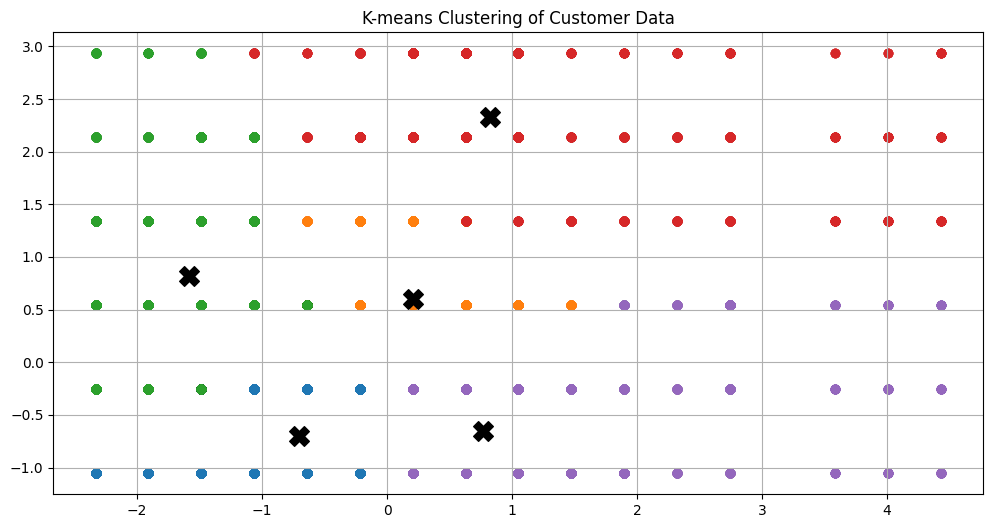

In [94]:
# Plotting the dataset and the clustering result
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot the data points colored by clusters
for cluster_id in range(num_clusters):
    plt.scatter(
        X[df['cluster'] == cluster_id, 0], 
        X[df['cluster'] == cluster_id, 1], 
        label=f'Cluster {cluster_id}'
    )
    
# Plot cluster centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    s=200,
    marker='X',
    c='black',
    label='Centroids'
)
# plt.xlabel('Standardized Numerical Features and One-Hot Encoded Categorical Features')
# plt.ylabel('Standardized Numerical Features and One-Hot Encoded Categorical Features')
# plt.legend()
plt.title('K-means Clustering of Customer Data')
plt.grid(True)
plt.show()

In [90]:
def predict_loyal_group(new_customer_data):
    # Preprocess the new customer data
    new_customer_data = pd.DataFrame(new_customer_data, index=[0])
    new_X = preprocessor.transform(new_customer_data[features])
    
    # Predict the cluster for the new customer
    cluster = kmeans.predict(new_X)[0]
    
    # Map cluster to 'loyal_group' based on patterns observed in the training data
    cluster_to_loyal_group = {
        0: 'WHITE',
        1: 'BRONZE',
        2: 'SILVER',
        3: 'GOLD',
        4: 'PLATINUM',
        5: 'BLACK' 
    }
    return cluster_to_loyal_group.get(cluster, 'Unknown')

# Perfrom the predict model with an example data

In [91]:
# Example usage: Get input from the user for a new customer's information
new_customer_info = {
    'gender': 'Nam',
    'marital_status': 'Đã kết hôn',
    'education': 'Đại Học',
    'occupation': 'Kỹ thuật viên',
    'yearly_income': 10000,
    'total_children': 1,
    'is_active': True
}

In [92]:
predicted_loyal_group = predict_loyal_group(new_customer_info)
print("Predicted Loyal Group:", predicted_loyal_group)

Predicted Loyal Group: SILVER
